### 1. 문제정의
- 머신러닝 모델을 어디에 사용할건지, 어떻게 사용할건지
- 키와 몸무게 비만도 지수를 통해서 비만을 판단하는 모델을 만들어보자

### 2. 데이터수집

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # 머신러닝 모델
from sklearn import metrics # 평가를 위한 모듈

In [3]:
tbl = pd.read_csv('./data/bmi_500.csv' ,index_col = 'Label')
tbl

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


### 3.데이터 전처리
- 전처리가 완료된 데이터를 가져왔기 때문에 생략

### 4.탐색적 데이터 분석

In [4]:
tbl.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [5]:
# 전체 row 수, 결측치 여부, 컬럼별 정보
# info()
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.7+ KB


In [7]:
# 기술통계 확인
# describe()
tbl.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [8]:
# 인덱스 종류 확인  --> unique 중복제거 함수
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

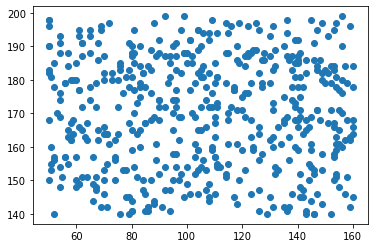

In [9]:
# 간단하게 시각화
# 키와 몸무게를 사용해서 시각화
plt.scatter(tbl['Weight'],tbl['Height'])
plt.show()

In [13]:
# 산점도를 표시하는 함수를 만들자
def myScatter(label, color):   # 이름은 myScatter, 사용하는 값은 label,color
    tmp = tbl.loc[label]       # label값을 통해서 값을 불러옴   
    plt.scatter(tmp['Weight'], 
                tmp['Height'],
                c = color,     
                label = label) # 범례 추가 기능
    

def myScatter(label,color):
    tmp = tbl.loc[label]
    plt.scatter(tmp['Weight'],
                tmp['Height'],
                c=col)

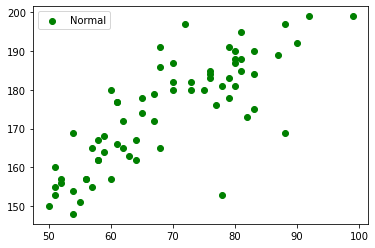

In [14]:
# 정상인 사람들만 출력
myScatter('Normal','green')
plt.legend() # 범례 출력 기능
plt.show()

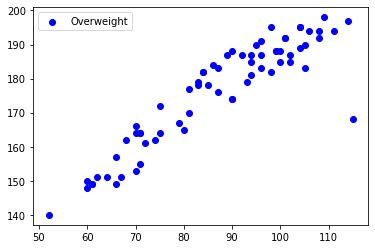

In [15]:
#  사람들만 출력
myScatter('Overweight','blue')
plt.legend() # 범례 출력 기능
plt.show()

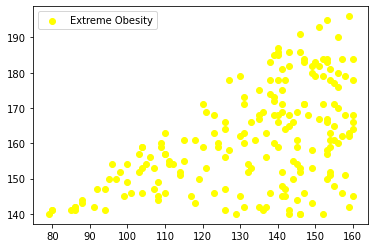

In [16]:
myScatter('Extreme Obesity','yellow')
plt.legend()
plt.show()

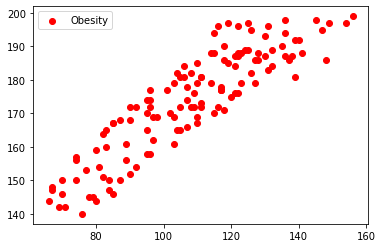

In [17]:
myScatter('Obesity','red')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

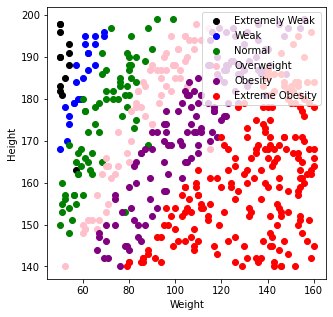

In [19]:
# 한번에 출력하기
plt.figure(figsize = (5,5)) # 그래프의 가로, 세로 크기 설정

myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')

plt.legend(loc = 'upper right') # 우측 상단에 범례 표시
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show

### 5. 모델 선택
- 1. 데이터를 문제와 정답으로 분리
- 2. 훈련데이터와 평가데이터로 분리
- 3. 모델 생성 및 하이퍼 파라미터 조정
- 4. 학습 및 평가

In [21]:
data = pd.read_csv('./data/bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [23]:
#  문제(X)와 정답(y)으로 분리
X = data.loc[ : , 'Height' : 'Weight']   # dataFrame(2차원)
y = data.loc[ : , 'Label']   # Series(1차원)

In [26]:
X.shape,y.shape

((500, 2), (500,))

In [29]:
# 훈련(train)과 평가(test)로 분리
# 7:3 비율
# X_train : 훈련용 문제
# X_test : 평가용 문제
# y_train : 훈련용 정답
# y_test : 평가용 정답
X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [33]:
# 머신러닝 모델 로드
knn_model = KNeighborsClassifier(n_neighbors=10)

### 6. 모델 학습

In [34]:
# 훈련용 문제와 정답을 활용해서 학습시키기
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
# 평가를 하기위해서 예측
pre = knn_model.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'E

### 7. 모델 평가

In [36]:
# 예측값(pre)을 실제 정답(y_test)과 비교해서 정확도 평가
metrics.accuracy_score(pre,y_test)

0.9333333333333333

### 학습된 모델에 키와 몸무게를 넣어서 확인

In [37]:
knn_model.predict([[174,68]])

array(['Normal'], dtype=object)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # 머신러닝 모델
from sklearn import metrics # 평가를 위한 모듈

tbl = pd.read_csv('./data/bmi_500.csv' ,index_col = 'Label')
tbl

tbl.loc['Normal']

tbl.info()

tbl.describe()

tbl.index.unique()

plt.scatter(tbl['Weight'],tbl['Height'])
plt.show()

# 산점도를 표시하는 함수를 만들자
def myScatter(label, color):   # 이름은 myScatter, 사용하는 값은 label,color
    tmp = tbl.loc[label]       # label값을 통해서 값을 불러옴   
    plt.scatter(tmp['Weight'], 
                tmp['Height'],
                c = color,     
                label = label) # 범례 추가 기능
    
# 정상인 사람들만 출력
myScatter('Normal','green')
plt.legend() # 범례 출력 기능
plt.show()

# 한번에 출력하기
plt.figure(figsize = (5,5)) # 그래프의 가로, 세로 크기 설정

myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')

plt.legend(loc = 'upper right') # 우측 상단에 범례 표시
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show

data = pd.read_csv('./data/bmi_500.csv')
data

#  문제(X)와 정답(y)으로 분리
X = data.loc[ : , 'Height' : 'Weight']   # dataFrame(2차원)
y = data.loc[ : , 'Label']   # Series(1차원)

X.shape,y.shape

# 훈련(train)과 평가(test)로 분리
# 7:3 비율
# X_train : 훈련용 문제
# X_test : 평가용 문제
# y_train : 훈련용 정답
# y_test : 평가용 정답
X_train = X.iloc[:350,:]
X_test = X.iloc[350:,:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

# 머신러닝 모델 로드
knn_model = KNeighborsClassifier(n_neighbors=10)

# 훈련용 문제와 정답을 활용해서 학습시키기
knn_model.fit(X_train,y_train)

# 평가를 하기위해서 예측
pre = knn_model.predict(X_test)
pre

# 예측값(pre)을 실제 정답(y_test)과 비교해서 정확도 평가
metrics.accuracy_score(pre,y_test)

knn_model.predict([[174,68]])